## Not rellevant anymore


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.utils import make_chunks

my_audio = AudioSegment.from_file("DREGON_free-flight_nosource_room1.wav", "wav")

chunks_length_in_ms = 1000

chunks = make_chunks(my_audio, chunks_length_in_ms)

for i, chunk in enumerate(chunks):
  chunk_name = "DREGON_free-flight_nosource_room1-{}.wav".format(i)
  print("exporting " + chunk_name)
  chunk.export(chunk_name, format="wav")

exporting DREGON_free-flight_nosource_room1-0.wav
exporting DREGON_free-flight_nosource_room1-1.wav
exporting DREGON_free-flight_nosource_room1-2.wav
exporting DREGON_free-flight_nosource_room1-3.wav
exporting DREGON_free-flight_nosource_room1-4.wav
exporting DREGON_free-flight_nosource_room1-5.wav
exporting DREGON_free-flight_nosource_room1-6.wav
exporting DREGON_free-flight_nosource_room1-7.wav
exporting DREGON_free-flight_nosource_room1-8.wav
exporting DREGON_free-flight_nosource_room1-9.wav
exporting DREGON_free-flight_nosource_room1-10.wav
exporting DREGON_free-flight_nosource_room1-11.wav
exporting DREGON_free-flight_nosource_room1-12.wav
exporting DREGON_free-flight_nosource_room1-13.wav
exporting DREGON_free-flight_nosource_room1-14.wav
exporting DREGON_free-flight_nosource_room1-15.wav
exporting DREGON_free-flight_nosource_room1-16.wav
exporting DREGON_free-flight_nosource_room1-17.wav
exporting DREGON_free-flight_nosource_room1-18.wav
exporting DREGON_free-flight_nosource_roo

In [ ]:
!pip install librosa

In [ ]:
import librosa
y, sr = librosa.load("DREGON_free-flight_nosource_room1-71.wav", mono=True, duration=30)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
print(chroma_stft)

[[0.8597056  0.9097052  1.         1.         1.         0.96462756]
 [0.6065842  0.7311283  0.7651288  0.46886423 0.5456347  0.61530286]
 [1.         1.         0.88363475 0.22812949 0.31723437 0.7376403 ]
 [0.68466395 0.509703   0.43371263 0.11851709 0.2238595  0.607676  ]
 [0.33870074 0.5841164  0.6337439  0.24515069 0.3991335  0.80370414]
 [0.305144   0.59507304 0.5255956  0.15783718 0.3282447  0.6469063 ]
 [0.29838684 0.4416979  0.5468488  0.17569785 0.1910389  0.4903386 ]
 [0.24381936 0.29823685 0.45802164 0.20720309 0.2270914  0.27519134]
 [0.3796285  0.3430899  0.30731165 0.15963118 0.22334525 0.214449  ]
 [0.41383445 0.31560796 0.34597668 0.14466408 0.16350766 0.2586035 ]
 [0.27642414 0.2186054  0.30006832 0.15686193 0.23614043 0.31998006]
 [0.552366   0.72726566 0.89873457 0.35914442 0.4670049  1.        ]]


In [ ]:
import numpy as np
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
print(spec_cent)
print(np.mean(spec_cent))

[[1718.44227415 1572.33059793 1642.07622044 1650.1990195  1570.14111303
  1460.77933304]]
1602.328093016143


In [ ]:
from pydub import AudioSegment
import os
from pathlib import Path

def chunk_audio_file(input_file, chunk_length_ms=1000, output_dir="chunks"):
    """
    Divide audio file into chunks and save them to a directory

    Args:
        input_file (str): Path to input audio file
        chunk_length_ms (int): Length of chunks in milliseconds
        output_dir (str): Directory to save chunks
    """
    # Create output directory if it doesn't exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Load audio file
    audio = AudioSegment.from_wav(input_file)

    # Get filename without extension for naming chunks
    base_filename = os.path.splitext(os.path.basename(input_file))[0]

    # Split audio into chunks
    chunks = [audio[i:i + chunk_length_ms]
             for i in range(0, len(audio), chunk_length_ms)]

    # Export chunks
    chunk_files = []
    for i, chunk in enumerate(chunks):
        # Create chunk filename with padding for proper sorting
        chunk_name = f"{base_filename}-chunk_{i:04d}.wav"
        chunk_path = os.path.join(output_dir, chunk_name)

        print(f"Exporting {chunk_path}")
        chunk.export(chunk_path, format="wav")
        chunk_files.append(chunk_path)

    return chunk_files

# Example usage
input_file = "DREGON_free-flight_nosource_room1.wav"
output_directory = "drone_chunks"  # Directory where chunks will be saved
chunk_length = 1000  # 1 second chunks

# Create chunks and get list of chunk files
chunk_files = chunk_audio_file(
    input_file=input_file,
    chunk_length_ms=chunk_length,
    output_dir=output_directory
)

# # Print all created chunk files
# print("\nCreated chunks:")
# for chunk_file in chunk_files:
#     print(chunk_file)

# # Example of how to iterate over chunks later
# print("\nIterating over chunks:")
# for chunk_file in sorted(Path(output_directory).glob("*.wav")):
#     #print(f"Processing {chunk_file}")
#     # Add your processing code here
#     # For example:
#     # audio = AudioSegment.from_wav(chunk_file)
#     # Do something with the audio...



Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0000.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0001.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0002.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0003.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0004.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0005.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0006.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0007.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0008.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0009.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0010.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0011.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0012.wav
Exporting drone_chunks/DREGON_free-flight_nosource_room1-chunk_0

In [ ]:
import pandas as pd

In [ ]:
# #def iterate_chunks_pathlib(directory="drone_chunks"):
# def iterate_chunks_pathlib(directory="drone_chunks", output_file="features.csv"):
#     features_list = []
#     # Get all .wav files in directory
#     chunk_path = Path(directory)
#     for chunk_file in sorted(chunk_path.glob("*.wav")):
#         # print(f"Processing {chunk_file}")
#         # Load audio data
#         #audio, sr = librosa.load(str(chunk_file))
#         y, sr = librosa.load(chunk_file, mono=True, duration=30)

#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         chroma_stft_mean = np.mean(chroma_stft)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_cent_mean = np.mean(spec_cent)
#         spec_bw= librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         spec_bw_mean = np.mean(spec_bw)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         rolloff_mean = np.mean(rolloff)
#         zsr = librosa.feature.zero_crossing_rate(y)
#         zsr_mean = np.mean(zsr)
#         #mfcc = librosa.feature.mfcc(y=y, sr=sr)

#         # Create a dictionary of features for this file
#         features_dict = {
#             'filename': chunk_file.name,
#             'chroma_stft_mean': chroma_stft_mean,
#             'spectral_centroid_mean': spec_cent_mean,
#             'spectral_bandwidth_mean': spec_bw_mean,
#             'rolloff_mean': rolloff_mean,
#             'zero_crossing_rate_mean': zsr_mean
#         }

#         # Append to our list of features
#         features_list.append(features_dict)

#     # Convert to DataFrame
#     df = pd.DataFrame(features_list)

#     # Save to CSV in the same directory
#     output_path = os.path.join(directory, output_file)
#     df.to_csv(output_path, index=False)
#     print(f"\nFeatures saved to {output_path}")

#     return df.head()

In [ ]:
# iterate_chunks_pathlib(directory="drone_chunks", output_file="features.csv")

Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0000.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0001.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0002.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0003.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0004.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0005.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0006.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0007.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0008.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0009.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0010.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0011.wav
Processing drone_chunks/DREGON_free-flight_nosource_room1-chunk_0012.wav
Processing drone_chunks/DREGON_free-flight_nosource

,filename,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean
0,DREGON_free-flight_nosource_room1-chunk_0000.wav,0.528923,1889.965686,2330.968503,4463.245739,0.071844
1,DREGON_free-flight_nosource_room1-chunk_0001.wav,0.443743,1971.554366,2351.300104,4530.047607,0.082309
2,DREGON_free-flight_nosource_room1-chunk_0002.wav,0.469577,1976.890586,2363.908357,4561.858021,0.079778
3,DREGON_free-flight_nosource_room1-chunk_0003.wav,0.394065,1945.821218,2340.946869,4513.897705,0.077015
4,DREGON_free-flight_nosource_room1-chunk_0004.wav,0.453650,1967.979945,2348.414573,4553.293679,0.077548


In [ ]:
# from pydub import AudioSegment
# import os
# from pathlib import Path

# def chunk_audio_file(input_file, chunk_length_ms=10000, output_dir="chunks"):
#     """
#     Divide audio file into chunks and save them to a directory

#     Args:
#         input_file (str): Path to input audio file
#         chunk_length_ms (int): Length of chunks in milliseconds
#         output_dir (str): Directory to save chunks
#     """
#     # Create output directory if it doesn't exist
#     Path(output_dir).mkdir(parents=True, exist_ok=True)

#     # Load audio file
#     audio = AudioSegment.from_wav(input_file)

#     # Get filename without extension for naming chunks
#     base_filename = os.path.splitext(os.path.basename(input_file))[0]

#     # Split audio into chunks
#     chunks = [audio[i:i + chunk_length_ms]
#              for i in range(0, len(audio), chunk_length_ms)]

#     # Export chunks
#     chunk_files = []
#     for i, chunk in enumerate(chunks):
#         # Create chunk filename with padding for proper sorting
#         chunk_name = f"{base_filename}-chunk_{i:04d}.wav"
#         chunk_path = os.path.join(output_dir, chunk_name)

#         #print(f"Exporting {chunk_path}")
#         chunk.export(chunk_path, format="wav")
#         chunk_files.append(chunk_path)

#     return chunk_files

In [ ]:
# import os
# import zipfile
# import tempfile
# import librosa
# import numpy as np
# import pandas as pd

# def extract_features_from_wav(wav_path):
#     """
#     Extract audio features from a single WAV file

#     Args:
#         wav_path (str): Path to WAV file

#     Returns:
#         dict: Extracted audio features
#     """
#     y, sr = librosa.load(wav_path, mono=True, duration=30)

#     return {
#         'filename': os.path.basename(wav_path),
#         'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
#         'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
#         'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
#         'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
#         'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y))
#     }

# def process_zip_folders(zip_folder_path):
#     """
#     Process WAV files from ZIP folders in a directory

#     Args:
#         zip_folder_path (str): Path to directory containing ZIP folders

#     Returns:
#         pandas.DataFrame: DataFrame with extracted features
#     """
#     all_features = []

#     # Iterate through all ZIP files in the directory
#     for zip_filename in os.listdir(zip_folder_path):
#         if zip_filename.endswith('.zip'):
#             zip_path = os.path.join(zip_folder_path, zip_filename)

#             # Create temporary directory to extract files
#             with tempfile.TemporaryDirectory() as temp_dir:
#                 # Extract ZIP contents
#                 with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                     zip_ref.extractall(temp_dir)

#                 # Find and process WAV files
#                 for root, dirs, files in os.walk(temp_dir):
#                     for file in files:
#                         if file.endswith('.wav'):
#                             wav_path = os.path.join(root, file)
#                             try:
#                                 features = extract_features_from_wav(wav_path)
#                                 features['zip_source'] = zip_filename
#                                 all_features.append(features)
#                                 print(f"Processed: {wav_path}")
#                             except Exception as e:
#                                 print(f"Error processing {wav_path}: {e}")

#     # Convert features to DataFrame
#     features_df = pd.DataFrame(all_features)

#     # Save to CSV in the ZIP folder directory
#     output_path = os.path.join(zip_folder_path, 'audio_features.csv')
#     features_df.to_csv(output_path, index=False)
#     print(f"\nFeatures saved to {output_path}")

#     return features_df

# # Example usage
# if __name__ == "__main__":
#     #zip_folder_directory = "path/to/your/zip/folders"
#     zip_folder_names = ['']
#     features_df = process_zip_folders(zip_folder_directory)
#     print("\nFirst few rows of extracted features:")
#     print(features_df.head())

In [ ]:
# !pip install pydub

In [ ]:
# import os
# import zipfile
# import tempfile
# import librosa
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from pydub import AudioSegment

# def chunk_audio_file(label, input_file, chunk_length_ms=10000, output_dir="chunks"):
#     """
#     Divide audio file into chunks and save them to a directory

#     Args:
#         input_file (str): Path to input audio file
#         chunk_length_ms (int): Length of chunks in milliseconds
#         output_dir (str): Directory to save chunks
#     """
#     # Create output directory if it doesn't exist
#     Path(output_dir).mkdir(parents=True, exist_ok=True)

#     # Load audio file
#     audio = AudioSegment.from_wav(input_file)

#     # Get filename without extension for naming chunks
#     base_filename = os.path.splitext(os.path.basename(input_file))[0]

#     # Split audio into chunks
#     chunks = [audio[i:i + chunk_length_ms]
#              for i in range(0, len(audio), chunk_length_ms)]

#     # Export chunks
#     chunk_files = []
#     for i, chunk in enumerate(chunks):
#         # Create chunk filename with padding for proper sorting
#         chunk_name = f"{base_filename}-chunk_{i:04d}.wav"
#         chunk_path = os.path.join(output_dir, chunk_name)

#         chunk.export(chunk_path, format="wav")
#         chunk_files.append(chunk_path)

#     return chunk_files

# def extract_features_from_wav(wav_path):
#     """
#     Extract audio features from a single WAV file

#     Args:
#         wav_path (str): Path to WAV file

#     Returns:
#         dict: Extracted audio features
#     """
#     y, sr = librosa.load(wav_path, mono=True, duration=30)

#     return {
#         'filename': os.path.basename(wav_path),
#         'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
#         'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
#         'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
#         'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
#         'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
#         'label': label
#       }

# def process_zip_folders(label, zip_folder_path, chunk_length_ms=10000):
#     """
#     Process WAV files from ZIP folders, chunk them, and extract features

#     Args:
#         zip_folder_path (str): Path to directory containing ZIP folders
#         chunk_length_ms (int): Length of chunks in milliseconds

#     Returns:
#         pandas.DataFrame: DataFrame with extracted features
#     """
#     all_features = []

#     # Create a main output directory for all processed files
#     output_base_dir = os.path.join(zip_folder_path, 'processed_audio')
#     os.makedirs(output_base_dir, exist_ok=True)

#     # Iterate through all ZIP files in the directory
#     for zip_filename in os.listdir(zip_folder_path):
#         if zip_filename.endswith('.zip'):
#             zip_path = os.path.join(zip_folder_path, zip_filename)

#             # Create temporary directory to extract files
#             with tempfile.TemporaryDirectory() as temp_dir:
#                 # Extract ZIP contents
#                 with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                     zip_ref.extractall(temp_dir)

#                 # Find and process WAV files
#                 for root, dirs, files in os.walk(temp_dir):
#                     for file in files:
#                         if file.endswith('.wav'):
#                             wav_path = os.path.join(root, file)

#                             try:
#                                 # Create chunks directory for this WAV file
#                                 chunks_dir = os.path.join(output_base_dir, f"{os.path.splitext(file)[0]}_chunks")

#                                 # Chunk the audio file
#                                 chunk_files = chunk_audio_file(
#                                     wav_path,
#                                     chunk_length_ms=chunk_length_ms,
#                                     output_dir=chunks_dir
#                                 )

#                                 # Extract features for each chunk
#                                 for chunk_file in chunk_files:
#                                     features = extract_features_from_wav(chunk_file)
#                                     features['zip_source'] = zip_filename
#                                     features['original_wav'] = file
#                                     all_features.append(features)
#                                     print(f"Processed chunk: {chunk_file}")

#                             except Exception as e:
#                                 print(f"Error processing {wav_path}: {e}")

#     # Convert features to DataFrame
#     features_df = pd.DataFrame(all_features)

#     # Save to CSV in the base output directory
#     output_path = os.path.join(output_base_dir, 'audio_chunk_features.csv')
#     features_df.to_csv(output_path, index=False)
#     print(f"\nFeatures saved to {output_path}")

#     return features_df

# # Example usage
# if __name__ == "__main__":
#     #zip_folder_directory = "/content/zip_file_folder"
#     zip_folder_directory = "/content/Drone_noise"
#     #zip_folder_names = ['DREGON_free-flight_speech-high_room1.zip', "DREGON_free-flight_speech-low_room1.zip"]
#     label = "Drone"
#     features_df = process_zip_folders(label, zip_folder_directory, chunk_length_ms=10000)
#     #features_df = process_zip_folders(zip_folder_names, chunk_length_ms=10000)
#     print("\nFirst few rows of extracted features:")
#     print(features_df.head())

BadZipFile: File is not a zip file

#START


In [ ]:
!pip install pydub

ZIP UPLOAD AND FEATURES EXTRACTIONS

In [ ]:
import os
import zipfile
import tempfile
import librosa
import numpy as np
import pandas as pd
from pathlib import Path
from pydub import AudioSegment

def chunk_audio_file(input_file, chunk_length_ms=10000, output_dir="chunks"):
    """
    Divide audio file into chunks and save them to a directory
    """
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    audio = AudioSegment.from_wav(input_file)
    base_filename = os.path.splitext(os.path.basename(input_file))[0]

    chunks = [audio[i:i + chunk_length_ms]
             for i in range(0, len(audio), chunk_length_ms)]

    chunk_files = []
    for i, chunk in enumerate(chunks):
        chunk_name = f"{base_filename}-chunk_{i:04d}.wav"
        chunk_path = os.path.join(output_dir, chunk_name)

        chunk.export(chunk_path, format="wav")
        chunk_files.append(chunk_path)

    return chunk_files

def extract_features_from_wav(label, wav_path):
    """
    Extract audio features from a single WAV file
    """
    y, sr = librosa.load(wav_path, mono=True, duration=30)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    n_mfcc = 13
    # Add MFCC features to the dictionary
    mfcc_features = {}
    for i in range(n_mfcc):
        mfcc_features[f'mfcc{i+1}_mean'] = np.mean(mfcc[i])
        mfcc_features[f'mfcc{i+1}_std'] = np.std(mfcc[i])

    rest_of_the_features = {
        'filename': os.path.basename(wav_path),
        'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        'label': label
    }

    # Combine all features
    all_features = {**rest_of_the_features, **mfcc_features}

    return all_features

    # return {
    #     'filename': os.path.basename(wav_path),
    #     'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
    #     'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
    #     'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
    #     'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
    #     'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
    #     'label': label
    # }

def process_single_zip_folder(label, zip_path, chunk_length_ms=10000):
    """
    Process WAV files from a single ZIP folder, chunk them, and extract features
    """
    all_features = []

    # Create output directories
    output_base_dir = os.path.join(os.path.dirname(zip_path), 'processed_audio')
    os.makedirs(output_base_dir, exist_ok=True)

    # Extract ZIP contents to temporary directory
    with tempfile.TemporaryDirectory() as temp_dir:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(temp_dir)

        # Find and process WAV files
        for root, dirs, files in os.walk(temp_dir):
            for file in files:
                if file.endswith('.wav'):
                    wav_path = os.path.join(root, file)

                    try:
                        # Create chunks directory for this WAV file
                        chunks_dir = os.path.join(output_base_dir, f"{os.path.splitext(file)[0]}_chunks")

                        # Chunk the audio file
                        chunk_files = chunk_audio_file(
                            wav_path,
                            chunk_length_ms=chunk_length_ms,
                            output_dir=chunks_dir
                        )

                        # Extract features for each chunk
                        for chunk_file in chunk_files:
                            features = extract_features_from_wav(label, chunk_file)
                            features['original_wav'] = file
                            all_features.append(features)
                            #print(f"Processed chunk: {chunk_file}")

                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")

    # Convert features to DataFrame
    features_df = pd.DataFrame(all_features)

    # Save to CSV in the base output directory
    output_path = os.path.join(output_base_dir, 'audio_chunk_features.csv')
    features_df.to_csv(output_path, index=False)
    print(f"\nFeatures saved to {output_path}")

    return features_df

# Example usage
if __name__ == "__main__":
    zip_file_path = "/content/Drone_noise/drone_new.zip"
    label = "drone"
    features_df = process_single_zip_folder(label, zip_file_path, chunk_length_ms=1000)
    print("\nFirst few rows of extracted features:")
    print(features_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/Drone_noise/drone_new.zip'

In [ ]:
# Example usage
if __name__ == "__main__":
    zip_file_path = "/content/NO_Drone_noise/no_drone_outside_2.zip"
    label = "NO_drone"
    features_df = process_single_zip_folder(label, zip_file_path, chunk_length_ms=1000)
    print("\nFirst few rows of extracted features:")
    print(features_df.head())

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1257
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1455
  warnings.warn(



Features saved to /content/NO_Drone_noise/processed_audio/audio_chunk_features.csv

First few rows of extracted features:
              filename  chroma_stft_mean  spectral_centroid_mean  \
0  g0_5-chunk_0000.wav          0.844540              410.042694   
1  g0_5-chunk_0001.wav          0.695001              877.954239   
2  g0_5-chunk_0002.wav          0.728090             1319.099747   
3  g0_5-chunk_0003.wav          0.709038             1541.636480   
4  g0_5-chunk_0004.wav          0.718779             1802.331308   

   spectral_bandwidth_mean  rolloff_mean  zero_crossing_rate_mean     label  \
0              1297.371607    478.134988                 0.001065  NO_drone   
1              1907.473050   1598.106246                 0.006758  NO_drone   
2              2347.423692   3392.458274                 0.008556  NO_drone   
3              2492.766254   4017.655251                 0.022694  NO_drone   
4              2610.057503   4900.516579                 0.041981  NO_dro

CSV UPLOAD

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Load datasets
drone_df = pd.read_csv('drone_features_lab.csv')
no_drone_df = pd.read_csv('no_drone_features_original.csv')

# Add label column (if not already done)
drone_df['label'] = 1  # 1 for drone
no_drone_df['label'] = 0  # 0 for no drone

drone_df.head()

,filename,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,label,mfcc1_mean,mfcc1_std,mfcc2_mean,...,mfcc9_std,mfcc10_mean,mfcc10_std,mfcc11_mean,mfcc11_std,mfcc12_mean,mfcc12_std,mfcc13_mean,mfcc13_std,original_wav
0,Motor1_60-chunk_0000.wav,0.597072,3285.233159,3161.004809,7554.973256,0.115168,1,-675.95730,9.303258,73.082960,...,2.724594,8.028169,3.018223,-2.917681,2.977890,3.604713,2.887058,-6.119924,3.226091,Motor1_60.wav
1,Motor1_60-chunk_0001.wav,0.547416,2711.522168,2763.051220,5901.076438,0.115401,1,-626.66430,36.048040,89.121120,...,3.726630,9.007204,3.396554,2.717505,6.112594,13.009749,8.338121,-3.283602,4.224776,Motor1_60.wav
2,Motor1_60-chunk_0002.wav,0.511436,2386.322913,2641.097954,5394.312078,0.100053,1,-614.97140,31.266129,98.450270,...,4.845920,9.404541,5.137663,2.498086,4.107827,14.412082,4.677806,-3.600671,4.103189,Motor1_60.wav
3,Motor1_60-chunk_0003.wav,0.466142,2686.355501,2936.009127,6527.741588,0.101352,1,-649.19696,8.443178,90.259860,...,4.556361,5.050886,3.692108,-1.693412,2.082140,14.262816,2.491662,-0.430853,3.720712,Motor1_60.wav
4,Motor1_60-chunk_0004.wav,0.505453,2936.901028,2638.532135,5837.700306,0.137107,1,-463.37784,64.015950,74.835495,...,6.467727,10.391295,5.918249,9.705687,5.831885,16.508688,5.879173,-7.877840,6.096139,Motor1_60.wav


In [ ]:
# drone_df.drop(columns=["filename", "original_wav"])
# no_drone_df.drop(columns=["filename", "original_wav"])

DATA ARAINGING


In [ ]:
drone_df = drone_df.drop(columns=["filename", "original_wav"])
no_drone_df = no_drone_df.drop(columns=["filename", "original_wav"])
# Combine datasets
combined_df = pd.concat([drone_df, no_drone_df], ignore_index=True)

# Shuffle the data
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Separate features and labels
X = combined_df.drop('label', axis=1)
y = combined_df['label']

column_names = X.columns
print(column_names)

print(y.head())
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(combined_df.shape[0])
combined_df.head()
# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Index(['chroma_stft_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
       'rolloff_mean', 'zero_crossing_rate_mean', 'mfcc1_mean', 'mfcc1_std',
       'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean',
       'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std',
       'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean',
       'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std',
       'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean', 'mfcc13_std'],
      dtype='object')
0    0
1    0
2    0
3    1
4    0
Name: label, dtype: int64
2901


,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,label,mfcc1_mean,mfcc1_std,mfcc2_mean,mfcc2_std,...,mfcc9_mean,mfcc9_std,mfcc10_mean,mfcc10_std,mfcc11_mean,mfcc11_std,mfcc12_mean,mfcc12_std,mfcc13_mean,mfcc13_std
0,0.130594,1074.546755,1076.078704,1021.358975,0.074840,0,-796.16480,68.852650,76.955250,10.626058,...,28.531008,10.894341,18.198698,17.953530,3.256634,21.181883,-8.030244,17.426924,-10.960536,13.090655
1,0.127211,4049.095331,819.408175,4131.928045,0.357877,0,-826.65280,45.349384,39.759823,15.127492,...,14.446499,15.288761,10.910135,17.952840,-10.608150,11.997786,13.053472,14.517347,2.154155,20.211634
2,0.128163,1090.477585,1132.366296,980.494829,0.074718,0,-802.93200,55.273308,83.078520,11.497433,...,28.469383,9.989057,16.203499,14.440910,0.775902,18.005407,-11.877340,17.939548,-14.450001,15.829387
3,0.315400,1785.216601,2139.546812,4194.325395,0.081543,1,-605.26337,82.376840,122.995950,7.213840,...,-20.646566,3.853383,7.842108,3.779007,10.292174,3.936170,13.605166,3.433090,7.812801,2.349422
4,0.338772,2021.251653,1818.973092,3958.928334,0.108254,0,-679.03470,69.382454,110.580246,47.267784,...,-8.380024,11.351968,0.217321,9.556385,-17.796722,10.541284,-1.402443,6.849812,-1.332280,9.389281


In [ ]:
X.head()

,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,mfcc1_mean,mfcc1_std,mfcc2_mean,mfcc2_std,mfcc3_mean,...,mfcc9_mean,mfcc9_std,mfcc10_mean,mfcc10_std,mfcc11_mean,mfcc11_std,mfcc12_mean,mfcc12_std,mfcc13_mean,mfcc13_std
0,0.130594,1074.546755,1076.078704,1021.358975,0.074840,-796.16480,68.852650,76.955250,10.626058,13.486707,...,28.531008,10.894341,18.198698,17.953530,3.256634,21.181883,-8.030244,17.426924,-10.960536,13.090655
1,0.127211,4049.095331,819.408175,4131.928045,0.357877,-826.65280,45.349384,39.759823,15.127492,2.950535,...,14.446499,15.288761,10.910135,17.952840,-10.608150,11.997786,13.053472,14.517347,2.154155,20.211634
2,0.128163,1090.477585,1132.366296,980.494829,0.074718,-802.93200,55.273308,83.078520,11.497433,9.339128,...,28.469383,9.989057,16.203499,14.440910,0.775902,18.005407,-11.877340,17.939548,-14.450001,15.829387
3,0.315400,1785.216601,2139.546812,4194.325395,0.081543,-605.26337,82.376840,122.995950,7.213840,6.124825,...,-20.646566,3.853383,7.842108,3.779007,10.292174,3.936170,13.605166,3.433090,7.812801,2.349422
4,0.338772,2021.251653,1818.973092,3958.928334,0.108254,-679.03470,69.382454,110.580246,47.267784,-11.216127,...,-8.380024,11.351968,0.217321,9.556385,-17.796722,10.541284,-1.402443,6.849812,-1.332280,9.389281


In [ ]:
y.head()

,label
0,0
1,0
2,0
3,1
4,0


In [ ]:
print(y.value_counts())

label
1    1902
0     999
Name: count, dtype: int64


In [ ]:
# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Rendom Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train_scaled, y_train)
clf_rf.fit(X_train, y_train)

# Evaluate the model
# y_pred = clf.predict(X_test_scaled)
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       196
           1       0.99      1.00      0.99       385

    accuracy                           0.99       581
   macro avg       0.99      0.99      0.99       581
weighted avg       0.99      0.99      0.99       581

[[193   3]
 [  1 384]]


In [ ]:
# Predict on test data
# y_pred = clf.predict(X_test_scaled)
#y_pred = clf.predict(X_test)

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Optional: Test on new data
# new_data_scaled = scaler.transform(X_test)
# predictions = clf.predict(new_data_scaled)

Accuracy: 0.9970760233918129
Precision: 0.9947643979057592
Recall: 1.0
F1 Score: 0.9973753280839895

Confusion Matrix:
 [[302   2]
 [  0 380]]


SVM MODEL

In [ ]:
from sklearn import svm

clf_svm = svm.SVC(probability=True)
# clf.fit(X_train_scaled, y_train)
clf_svm.fit(X_train, y_train)

# Evaluate the model
# y_pred = clf.predict(X_test_scaled)
y_pred = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Predict on test data
# y_pred = clf.predict(X_test_scaled)
#y_pred = clf.predict(X_test)

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Optional: Test on new data
# new_data_scaled = scaler.transform(X_test)
# predictions = clf.predict(new_data_scaled)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       196
           1       0.92      0.98      0.95       385

    accuracy                           0.93       581
   macro avg       0.94      0.91      0.92       581
weighted avg       0.93      0.93      0.93       581

[[163  33]
 [  8 377]]
Accuracy: 0.9294320137693631
Precision: 0.9195121951219513
Recall: 0.9792207792207792
F1 Score: 0.9484276729559749

Confusion Matrix:
 [[163  33]
 [  8 377]]


## Using the model

In [ ]:
!pip install pydub

In [ ]:
import joblib

In [ ]:
joblib.dump(clf_svm, 'drone_detector_model.joblib')

['drone_detector_model.joblib']

RECORDING TETS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave

def plot_audio_signal_and_prediction(audio_path, prediction):
  # Load and process the wave file
  spf = wave.open(audio_path, "r")

  # Extract Raw Audio from Wav File
  signal = spf.readframes(-1)
  signal = np.frombuffer(signal, np.int16)  # Updated method
  fs = spf.getframerate()

  # Normalize the signal to range [-1, 1]
  signal = signal / np.max(np.abs(signal))

  # Time for the audio signal
  Time = np.linspace(0, len(signal) / fs, num=len(signal))

  # Prediction list (scaled to match the signal length)
  # prediction = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
  prediction_time = np.linspace(0, len(signal) / fs, num=len(prediction))  # Align with audio time

  # Upsample the prediction array to match the length of the signal
  upsampled_prediction = np.interp(Time, prediction_time, prediction)

  # # Plot both graphs
  # plt.figure(figsize=(12, 6))
  # plt.plot(Time, signal, label="Normalized Audio Signal", color="blue")
  # plt.plot(Time, upsampled_prediction, label="Drone Detection", color="red", linewidth=2)
  # Plot both graphs
  plt.figure(figsize=(12, 6))
  plt.plot(Time, signal, label="Audio Signal", color="blue")
  plt.step(prediction_time, prediction, where='post', label="Drone Detection", color="red")

  # Add labels, legend, and grid
  plt.title("Normalized Audio Signal and Drone Detection")
  plt.xlabel("Time (seconds)")
  plt.ylabel("Normalized Amplitude / Detection")
  plt.legend()
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.ylim(-1.5, 1.5)  # Set consistent y-axis limits

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0]


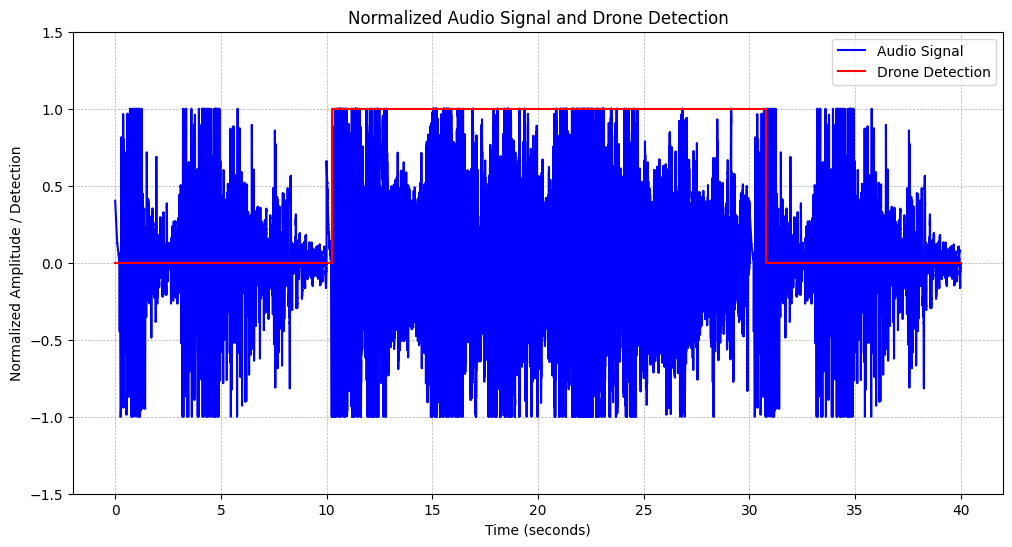

In [ ]:
import librosa
import numpy as np
import pandas as pd
from pathlib import Path
from pydub import AudioSegment
import os

def chunk_audio_file(input_file, chunk_length_ms=10000, output_dir="chunks"):
    """
    Divide audio file into chunks and save them to a directory
    """
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    audio = AudioSegment.from_wav(input_file)
    base_filename = os.path.splitext(os.path.basename(input_file))[0]

    chunks = [audio[i:i + chunk_length_ms]
             for i in range(0, len(audio), chunk_length_ms)]

    chunk_files = []
    for i, chunk in enumerate(chunks):
        chunk_name = f"{base_filename}-chunk_{i:04d}.wav"
        chunk_path = os.path.join(output_dir, chunk_name)

        chunk.export(chunk_path, format="wav")
        chunk_files.append(chunk_path)

    return chunk_files

def extract_features_from_wav(wav_path):
    """
    Extract audio features from a single WAV file
    """
    y, sr = librosa.load(wav_path, mono=True, duration=30)

    # return {
    #     'filename': os.path.basename(wav_path),
    #     'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
    #     'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
    #     'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
    #     'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
    #     'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
    # }
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    n_mfcc = 13
    # Add MFCC features to the dictionary
    mfcc_features = {}
    for i in range(n_mfcc):
        mfcc_features[f'mfcc{i+1}_mean'] = np.mean(mfcc[i])
        mfcc_features[f'mfcc{i+1}_std'] = np.std(mfcc[i])

    rest_of_the_features = {
        'filename': os.path.basename(wav_path),
        'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
    }

    # Combine all features
    all_features = {**rest_of_the_features, **mfcc_features}

    return all_features

def create_feature_df(wav_path, chunk_length_ms, chunks_dir):
    all_features = []
    # Chunk the audio file
    chunk_files = chunk_audio_file(
        wav_path,
        chunk_length_ms=chunk_length_ms,
        output_dir=chunks_dir
    )

    # Extract features for each chunk
    for chunk_file in chunk_files:
        features = extract_features_from_wav(chunk_file)
        #features['original_wav'] = file
        all_features.append(features)
        #print(f"Processed chunk: {chunk_file}")

        # Convert features to DataFrame
    features_df = pd.DataFrame(all_features)

    return features_df

# def process_audio_file(audio_path, sr=22050, duration=None):
#     """
#     Process a single audio file and extract the same features used in training
#     """
#     # Load audio file
#     y, sr = librosa.load(audio_path)

#     # Extract features (make sure these are the same features you used for training)
#     features = {
#         'rms': np.mean(librosa.feature.rms(y=y)),
#         'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y=y)),
#         'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
#         'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
#         'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
#         # Add any other features you used during training
#     }

#     return pd.DataFrame([features])

def predict_drone(audio_path, model, chunk_length_ms, chunks_dir):
    """
    Predict whether an audio file contains drone noise
    """
    # Process the audio file
    #features_df = process_audio_file(audio_path)
    features_df = create_feature_df(audio_path, chunk_length_ms, chunks_dir)
    #print(features_df.head())
    features_df = features_df.drop(columns=["filename"])
    features_df.to_csv("recorded_features.csv")

    # Make prediction
    prediction = model.predict(features_df)
    probability = model.predict_proba(features_df)
    #print(probability)
    # print(type(prediction))
    print(prediction)
    majority_label = np.bincount(prediction).argmax()
    # print(majority_label)
    #majority_label = max(l)

    # Calculate mean of each column
    label_0_prob_mean = np.mean(probability[:, 0])   # First column
    label_1_prob_mean = np.mean(probability[:, 1])  # Second column

    if majority_label == 1:
      conf = label_1_prob_mean
    else:
      conf = label_0_prob_mean

    plot_audio_signal_and_prediction(audio_path, prediction)
    return {
        #'is_drone': bool(prediction[0]),
        'is_drone': bool(majority_label),
        #'confidence': probability[0][1] if prediction[0] else probability[0][0]
        'confidence': conf
    }

# Example usage:
def main():
    # Load your trained model and scaler (assuming you saved them)
    import joblib

    # Load the saved model and scaler
    model = joblib.load('drone_detector_model.joblib')

    # Test on new audio file
    audio_path = "/content/10no_20yes_10no.wav"
    chunk_length_ms = 1000
    chunks_dir = "chunks"
    result = predict_drone(audio_path, model, chunk_length_ms, chunks_dir)

    # if result['is_drone']:
    #     print(f"Drone detected with {result['confidence']*100:.2f}% confidence")
    # else:
    #     print(f"No drone detected with {result['confidence']*100:.2f}% confidence")

# # Save your model and scaler (do this after training)
# import joblib
# joblib.dump(clf_svm, 'drone_detector_model.joblib')


if __name__ == "__main__":
    main()